# Overview of the Tutorial
- Imports
- Part A: Step-by-Step Walkthrough
- Part B: Wrapping Function Walkthrough
- Part C: Plotting Temperature Profile
# - Common Errors and Fixes

## Imports
### In order to import the musical robot packages - the package must be downloaded first - further instructions can be found in the package information

In [4]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#sys.path.insert(0, '../musicalrobot/')

In [6]:
# Importing the required modules
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa
from musicalrobot import data_encoding as de

In [7]:
%matplotlib inline

## PART A: Step-by-Step Walkthrough

#### Use the function 'edge_detection.input_file' to load the input file - a file is provided in the data folder

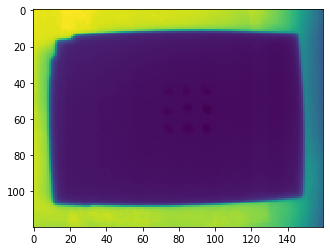

In [8]:
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

# NOTE: Need to replace with data with the border up

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

When cropping focus on removing any sections of large temperature disparity and evening out the temperatures over the range of the plate in the viewfinder

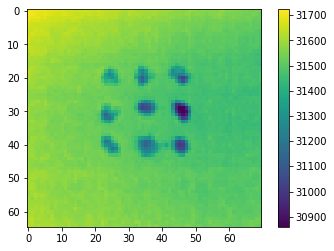

In [21]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[25:90,50:120])
plt.imshow(crop_frame[300])
plt.colorbar()

#### Equalize Image to determine sample position

In [24]:
img_eq = pa.image_eq(crop_frame)

#### Determining the sum of pixels in each column and row

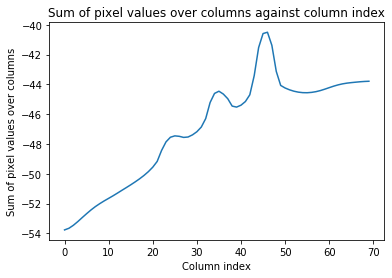

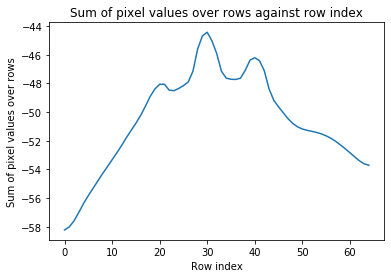

In [25]:
column_sum, row_sum = pa.pixel_sum(img_eq)

#### Determining the plate and sample locations

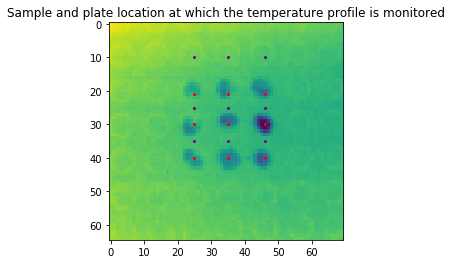

In [26]:
# input of the previous outputs as well as the known layout of samples

r_peaks, c_peaks = pa.peak_values(column_sum, row_sum, 3, 3, freeze_heat=False)
sample_location = pa.locations(r_peaks, c_peaks, img_eq)

In [28]:
#pixel location of sample in row 
r_peaks

[21, 30, 40]

In [29]:
#pixel location of sample in column
c_peaks

[25, 35, 46]

In [30]:
#outputs of all pixel locations
sample_location

,Row,Column,plate_location
0,21,25,10
1,30,25,25
2,40,25,35
3,21,35,10
4,30,35,25
5,40,35,35
6,21,46,10
7,30,46,25
8,40,46,35


#### Extract temperature profiles at all of the sample and plate locations

In [32]:
temp, plate_temp = pa.pixel_intensity(sample_location,crop_frame, 'Row', 'Column', 'plate_location')

#### Finding inflection Temperature

In [33]:
s_peaks, s_infl = ed.peak_detection(temp,plate_temp, 'Sample')

In [35]:
#lists all of the inflection points that were recorded over the samples
np.asarray(s_infl)[:,0]

array([47.07358994, 46.08467676, 44.95108666, 45.01406028, 44.65370247,
       44.19138207, 44.12452171, 43.11698266, 43.91498001])

#### Confirming validity of inflection point

This function will catagorize the calculated inflection points on the noise and inflection validity for each point - In this example all of the inflection points are catagorized as "noiseless" and "inflection" - this is ideal for inflection points. If the point has extra noise or is not catagorized as an inflection for sure, this is a suggestion to manually check the graphs.

In [36]:
result_df = de.final_result(temp, plate_temp, path='../musicalrobot/data/')

Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
result_df

,Sample number,Noise net,Inf net,Melting point
0,0,Noiseless,Inflection,47.0736
1,1,Noiseless,Inflection,46.0847
2,2,Noiseless,Inflection,44.9511
3,3,Noiseless,Inflection,45.0141
4,4,Noiseless,Inflection,44.6537
5,5,Noiseless,Inflection,44.1914
6,6,Noiseless,Inflection,44.1245
7,7,Noiseless,Inflection,43.117
8,8,Noiseless,Inflection,43.915


### Part B: Using Wrapping Function

All of the functions covered in part A are wrapped and can be run with a single row after the cropping function is run

#### Load and crop the image in the same way as in part A

#### Run the wrapping function

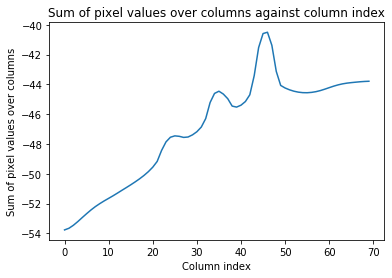

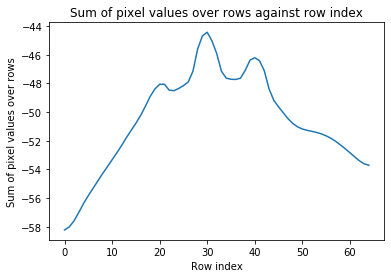

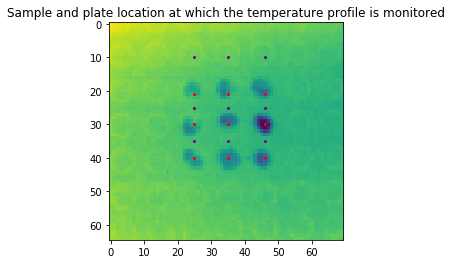

Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
result_df1 = pa.pixel_temp(crop_frame,n_columns = 3, n_rows = 3, freeze_heat=False, path='../musicalrobot/data/')

## Part C: Plotting Temperature Profiles

# Need to include the dual graph bit

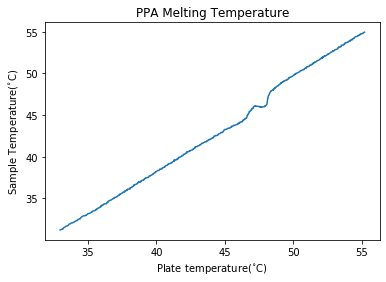

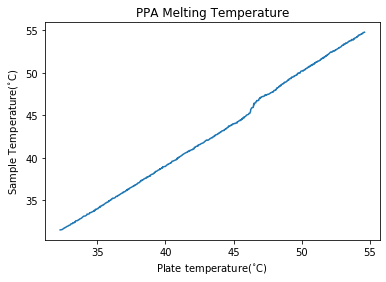

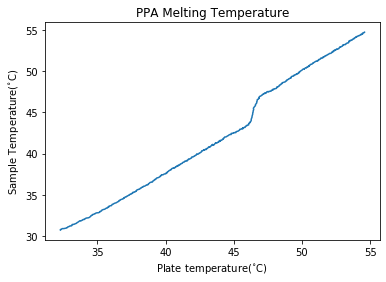

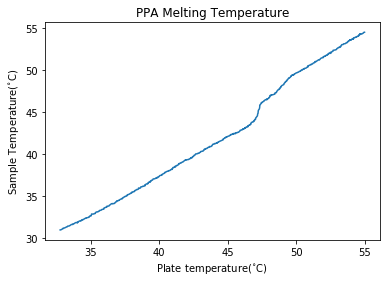

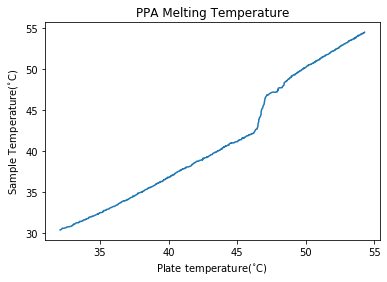

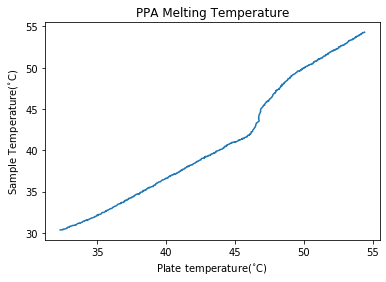

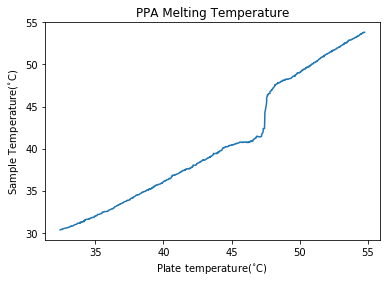

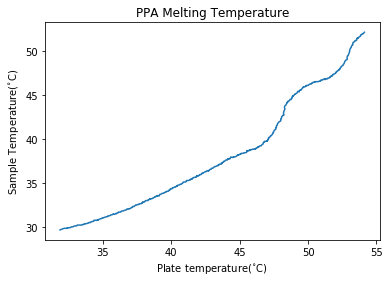

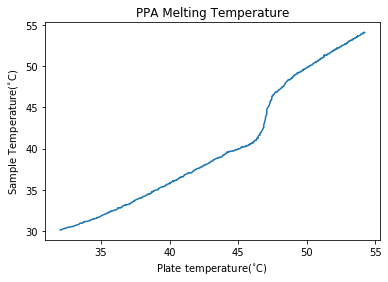

In [41]:
for i in range(len(temp)):
    plt.plot(plate_temp[i], temp[i])
    plt.title('PPA Melting Temperature')
    plt.xlabel('Plate temperature($^{\circ}$C)')
    plt.ylabel('Sample Temperature($^{\circ}$C)')
#   plt.savefig('../temp_profiles/ppa_'+ str(i+1)+ '.png')
# uncomment previous line to save figures into an established folder
    plt.show()